In [125]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,KFold,GridSearchCV
from sklearn.manifold import TSNE

from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.svm import SVC

from sklearn.metrics import precision_score,recall_score,f1_score,classification_report

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = 100

In [291]:
train = pd.read_csv('classification_train.csv')
test = pd.read_csv('classification_test.csv')

## EDA

In [128]:
len(train),len(test)

(18420, 4606)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18420 entries, 0 to 18419
Data columns (total 26 columns):
row_number             18420 non-null int64
day_of_week            18420 non-null int64
time_interval          18420 non-null int64
numerical_feature1     18420 non-null float64
binary_feature1        18420 non-null int64
numerical_feature2     18420 non-null float64
numerical_feature3     18420 non-null float64
numerical_feature4     18420 non-null float64
numerical_feature5     18420 non-null float64
numerical_feature6     18420 non-null float64
numerical_feature7     18420 non-null float64
numerical_feature8     18420 non-null float64
numerical_feature9     18420 non-null float64
numerical_feature10    18419 non-null float64
numerical_feature11    18419 non-null float64
numerical_feature12    18419 non-null float64
numerical_feature13    18419 non-null float64
numerical_feature14    18419 non-null float64
numerical_feature15    18419 non-null float64
numerical_feature16    18

In [72]:
train.head()

,row_number,day_of_week,time_interval,numerical_feature1,binary_feature1,numerical_feature2,numerical_feature3,numerical_feature4,numerical_feature5,numerical_feature6,numerical_feature7,numerical_feature8,numerical_feature9,numerical_feature10,numerical_feature11,numerical_feature12,numerical_feature13,numerical_feature14,numerical_feature15,numerical_feature16,numerical_feature17,numerical_feature18,numerical_feature19,numerical_feature20,numerical_feature21,target
0,1,6,28,-1.293887,0,-0.202881,-0.148187,-0.915432,0.123721,0.067026,-0.174143,-0.679518,-0.419538,-0.085589,-0.907569,0.158600,0.080291,-0.197479,-0.756770,-0.410152,-1.145737,-1.135511,-0.368707,-0.692058,-0.176466,1
1,2,5,9,2.046774,0,-0.202881,-0.429073,-1.381668,-0.153588,0.105036,0.340381,-0.358484,-1.187368,-0.225571,-1.322025,-0.036902,0.285351,0.574601,-0.367721,-1.378392,-0.797372,-0.857479,-0.315709,0.240003,-0.176466,0
2,3,6,13,1.789800,0,-0.202881,-0.268481,0.867711,-0.497171,-1.075316,-1.518250,0.797099,0.959080,-0.951920,0.394999,-1.006386,-1.337036,-0.733739,0.712635,0.309325,0.910619,0.606608,-0.594949,-0.651534,1.855187,0
3,4,7,19,0.504930,0,-0.202881,-0.619177,1.318468,-2.109093,-1.114104,0.327221,1.722900,0.683492,-1.416160,0.122735,-1.148890,-1.040386,-0.275062,0.653164,-0.116479,1.716941,1.326551,0.015649,0.158954,3.886840,0
4,5,3,9,-0.522965,0,-0.202881,-1.158597,-0.353492,-0.797533,-0.786577,-0.456209,0.208238,-0.321273,-1.166933,-0.011053,-0.923628,-0.995696,-0.493787,0.445493,-0.090425,-0.569411,-0.705167,-0.485654,-0.124716,-0.176466,1


In [27]:
train.target.value_counts(normalize=True)

0    0.500923
1    0.499077
Name: target, dtype: float64

In [73]:
train[[col for col in train.columns if 'numerical' in col]].describe()

,numerical_feature1,numerical_feature2,numerical_feature3,numerical_feature4,numerical_feature5,numerical_feature6,numerical_feature7,numerical_feature8,numerical_feature9,numerical_feature10,numerical_feature11,numerical_feature12,numerical_feature13,numerical_feature14,numerical_feature15,numerical_feature16,numerical_feature17,numerical_feature18,numerical_feature19,numerical_feature20,numerical_feature21
count,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18420.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18419.000000,18420.000000,18420.000000
mean,-0.004637,-0.000295,0.003799,0.000736,0.005228,0.004205,0.002685,-0.002729,0.001871,0.006395,-0.000676,0.008141,0.006883,0.003906,-0.004815,0.000463,-0.005381,-0.005341,-0.002344,0.000445,-0.006500
std,1.000443,0.999527,1.008043,1.003409,1.005749,1.005374,1.001369,1.000152,1.004276,1.007227,1.004028,1.005808,1.006305,1.001639,0.998324,1.007471,0.997451,0.997268,1.007052,1.000764,0.987563
min,-1.807835,-0.202881,-1.789510,-1.839408,-2.283283,-1.980911,-1.870994,-2.092420,-2.572195,-1.560905,-1.856822,-2.111801,-1.935753,-1.936510,-2.413073,-2.551180,-1.398410,-1.394246,-0.677634,-1.543071,-0.176466
25%,-0.779939,-0.202881,-0.690041,-0.741257,-0.707542,-0.770828,-0.694720,-0.643349,-0.492581,-0.715723,-0.732854,-0.709028,-0.791963,-0.595704,-0.681978,-0.522580,-0.807564,-0.804299,-0.519652,-0.651534,-0.176466
50%,-0.265991,-0.202881,-0.094823,-0.162567,-0.036937,-0.043635,-0.114775,0.029001,-0.083286,-0.113894,-0.092263,-0.060141,-0.088163,-0.232081,0.065220,-0.089512,-0.192969,-0.195431,-0.390390,-0.286814,-0.176466
75%,0.504930,-0.202881,0.597771,0.665734,0.668696,0.719044,0.634048,0.680481,0.575705,0.548632,0.563360,0.579317,0.601703,0.583599,0.651981,0.459906,0.611620,0.600291,0.038937,0.402101,-0.176466
max,5.901382,9.879596,17.882610,18.408528,15.934948,15.604594,15.208451,13.258007,17.480824,17.169138,18.733943,15.795156,16.117432,16.000404,14.560901,17.859575,4.846631,4.758302,19.072898,6.197090,20.140064


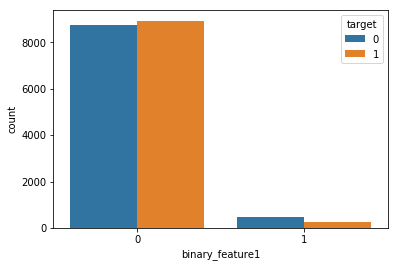

In [17]:
sns.countplot(data=train,x='binary_feature1',hue='target');

time_interval: min 0, max 35


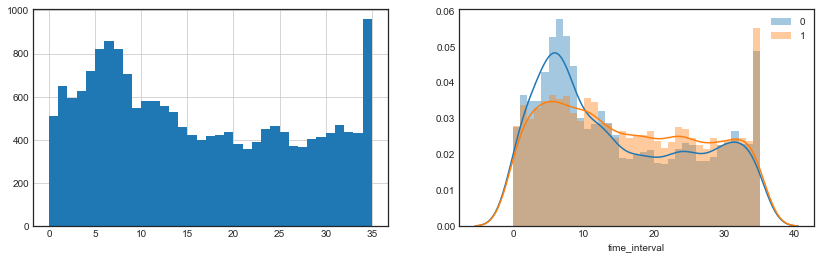

In [75]:
print('time_interval: min %s, max %s'%(min(train.time_interval),max(train.time_interval)))
f, axes = plt.subplots(1,2,figsize=(14,4))

train.time_interval.hist(bins=35,ax=axes[0])

sns.distplot(train[train.target==0].time_interval,bins=35,label='0',ax=axes[1])
sns.distplot(train[train.target==1].time_interval,bins=35,label='1',ax=axes[1])
plt.legend();

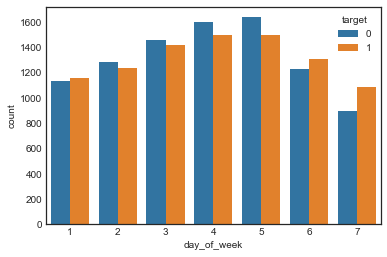

In [76]:
sns.countplot(data=train,x='day_of_week',hue='target');

In [157]:
%%time
sample = train.sample(8000,random_state=42)
tsne_data = TSNE(n_components=2,perplexity=80,metric='cosine',random_state=42).fit_transform(sample.iloc[:,1:-1])

CPU times: user 4min 27s, sys: 17.7 s, total: 4min 45s
Wall time: 4min 45s


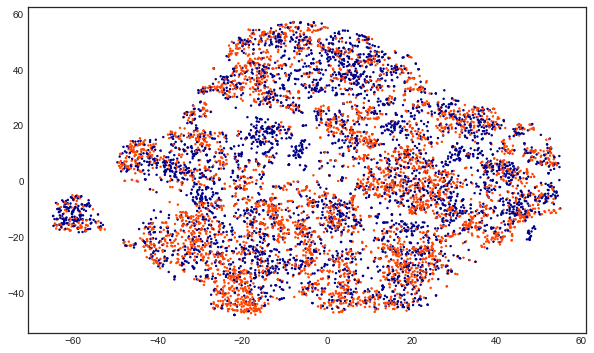

In [158]:
plt.figure(figsize=(10,6))
plt.scatter(tsne_data[:,0],tsne_data[:,1],s=2,c=sample.target.replace({0:'darkblue',1:'orangered'}));
#nothing special with tsne, as usual

----

## Classification

In [292]:
for col in train.columns[:-1]:
    train[col].fillna(value=train[col].mean(),inplace=True)

In [293]:
np.any(np.isnan(train)) #check

False

In [294]:
#don't forget to remove 'row_number' column ¯\_(ツ)_/¯
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,1:-1], train.iloc[:,-1:],\
                                                    test_size = 0.25,random_state=42)

#### Baseline

In [295]:
mmscaler = MinMaxScaler()
X_train_sc = mmscaler.fit_transform(X_train)
X_test_sc = mmscaler.transform(X_test)

In [296]:
%%time
lr = LogisticRegression()

kf = KFold(n_splits=5,shuffle=True,random_state=42)

gridsc = GridSearchCV(estimator=lr,\
                      param_grid={'penalty':['l1','l2'],\
                                  'C':np.linspace(1,10,50)},\
                      cv=kf)

gridsc.fit(X_train_sc,y_train.values.ravel())

CPU times: user 8min 46s, sys: 5.57 s, total: 8min 51s
Wall time: 8min


In [297]:
gridsc.best_estimator_

LogisticRegression(C=1.5510204081632653, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [298]:
baseline_preds = gridsc.predict(X_test_sc)

In [299]:
print(classification_report(y_test,baseline_preds))

             precision    recall  f1-score   support

          0       0.71      0.62      0.66      2329
          1       0.66      0.74      0.70      2276

avg / total       0.68      0.68      0.68      4605



#### Variant 1

In [300]:
%%time
xgb_cl = xgb.XGBClassifier()

kf = KFold(n_splits=5,shuffle=True,random_state=42)

xgb_gridsc = GridSearchCV(estimator=xgb_cl,\
                      param_grid={'max_depth':range(3,10,2),\
                                  'n_estimators':range(100,250,50),\
                                  'learning_rate':np.linspace(0.1,0.3,4)},\
                      cv=kf)

xgb_gridsc.fit(X_train,y_train.values.ravel())

CPU times: user 15min 29s, sys: 1min, total: 16min 30s
Wall time: 5min 40s


In [301]:
xgb_gridsc.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.10000000000000001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=150,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [302]:
xgb_preds = xgb_gridsc.predict(X_test)

In [304]:
print(classification_report(y_test,xgb_preds))

             precision    recall  f1-score   support

          0       0.72      0.63      0.67      2329
          1       0.66      0.75      0.70      2276

avg / total       0.69      0.69      0.69      4605



#### Variant 2

In [202]:
%%time
svc = SVC(random_state=42)

kf = KFold(n_splits=5,shuffle=True,random_state=42)

svc_gridsc = GridSearchCV(estimator=svc,\
                          param_grid={'kernel':['rbf','linear','poly','sigmoid'],\
                                      'C':np.linspace(1,10,20)},\
                          cv=kf)

svc_gridsc.fit(X_train_sc,y_train.values.ravel())

CPU times: user 48min 23s, sys: 37 s, total: 49min
Wall time: 49min 5s


In [203]:
!telegram-send 'done: svc_gridsc' #notifications in telegram

In [204]:
svc_gridsc.best_estimator_

SVC(C=7.1578947368421053, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [205]:
svc_preds = svc_gridsc.predict(X_test)

In [206]:
print(classification_report(y_test,svc_preds))

             precision    recall  f1-score   support

          0       0.81      0.43      0.56      2308
          1       0.61      0.90      0.73      2297

avg / total       0.71      0.66      0.64      4605



#### Feature engineering

In [305]:
#let's suggest that 'time_interval' is somehow connected with 'day_of_week' and measured in days
#count what the day of the week is the last day of time interval

def get_ti_end_day(dow,ti):
    try:
        if dow+ti<=7:
            return dow+ti
        else:
            rest = (dow+ti)%7
            if rest:
                return rest
            else:
                return 7
    except:
        pass

train['ti_end_day'] = train.apply(lambda row: get_ti_end_day(row[1],row[2]),axis=1)
train.ti_end_day = train.ti_end_day.astype(int)

test['ti_end_day'] = test.apply(lambda row: get_ti_end_day(row[1],row[2]),axis=1)
test.ti_end_day = test.ti_end_day.astype(int)

In [311]:
train[['day_of_week','time_interval','ti_end_day']].sample(5)

,day_of_week,time_interval,ti_end_day
13469,3,23,5
3204,4,0,4
9841,5,5,3
15808,7,34,6
2225,3,4,7


In [312]:
cols_for_model = ['day_of_week', 'time_interval','ti_end_day'] + [col for col in train.columns if 'feature' in col]

In [314]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(train[cols_for_model], train.target,\
                                                            test_size = 0.25,random_state=42)

In [316]:
%%time
xgb_cl = xgb.XGBClassifier()

kf = KFold(n_splits=5,shuffle=True,random_state=42)

xgb_f_gridsc = GridSearchCV(estimator=xgb_cl,\
                            param_grid={'max_depth':range(3,10,2),\
                                      'n_estimators':range(100,250,50),\
                                      'learning_rate':np.linspace(0.1,0.3,4)},\
                            cv=kf)

xgb_f_gridsc.fit(X_train_f,y_train_f.values.ravel())

CPU times: user 15min 38s, sys: 1min, total: 16min 39s
Wall time: 5min 40s


In [318]:
xgb_f_gridsc.best_estimator_

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.10000000000000001, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       nthread=-1, objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [315]:
#test on xgb
#without new feature
print(classification_report(y_test,xgb_preds))

             precision    recall  f1-score   support

          0       0.72      0.63      0.67      2329
          1       0.66      0.75      0.70      2276

avg / total       0.69      0.69      0.69      4605



In [317]:
#test on xgb
#with new feature
xgb_f_preds = xgb_f_gridsc.predict(X_test_f)
print(classification_report(y_test_f,xgb_f_preds))

             precision    recall  f1-score   support

          0       0.72      0.62      0.67      2329
          1       0.66      0.75      0.70      2276

avg / total       0.69      0.68      0.68      4605



In [ ]:
#looks like this feature isn't helpful